## Titanic3 dataset analysis

Thomas Cason from the University of Virginia has greatly updated and improved the titanic data frame using the Encyclopedia Titanica and created a new dataset called TITANIC3. This dataset reflects the state of data available as of August 2, 1999. Some duplicate passengers have been dropped; many errors have been corrected; many missing ages have been filled in; and new variables have been created.

https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3info.txt

#https://biostat.app.vumc.org/wiki/Main/DataSets

#https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic.html


In [2]:
# load python libraries

import pandas as pd  # data tools
import numpy as np  # maths
import seaborn as sns # visualizations
import missingno as msno # for NaN visualization
import matplotlib.pyplot as plt # for data visualization, graph plotting


In [4]:
# define the data set variables and their locations.

data_folder = './data/titanic3.xls'

data = pd.read_excel(data_folder)
print(data.shape)  # rows and columns in the data

(1309, 14)


## EDA

### Data Dictionary

VARIABLE DESCRIPTIONS:
| pclass                                             | Passenger Class   |  (1 = 1st; 2 = 2nd; 3 = 3rd)        |
| :---------------------------------------------------------------------------------------------------------- | --- | --- |
| survival   |  Survival     |   (0 = No; 1 = Yes)   |
| name          | name    |     |
| sex           | sex    |     |
| age                  | age    |     |
| sibsp                | Number of Siblings/Spouses Aboard    |     |
| parch                | Number of Parents/Children Aboard     |     |
| ticket               | Ticket Number     |     |
| fare                 | Passenger Fare     |     |
| cabin                | Cabin     |     |
| embarked                  | Port of Embarkation    | (C = Cherbourg; Q = Queenstown; S = Southampton)    |
| boat                | Lifeboat     |     |
| body                | Body Identification Number    |     |
| home.dest           | Home/Destination    |     |

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
If the Age is Estimated, it is in the form xx.5

Fare is in Pre-1970 British Pounds (£)
Conversion Factors:  1£ = 12s = 240d and 1s = 20d

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiancées Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [5]:
# taking a look at the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
data['ticket'] = data['ticket'].astype(str) # convert this entire column to string to keep things simple
data['boat'] = data['boat'].astype(str) # convert this entire column to string to keep things simple


In [7]:
# look at the header records for the datasets, what kind of data is there.
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,nan,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,nan,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,nan,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
data.describe() # run statistics on the data so we can get a feel for the data values

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [10]:
data.isnull().sum() # look at which fields have null values

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat            0
body         1188
home.dest     564
dtype: int64

<AxesSubplot:>

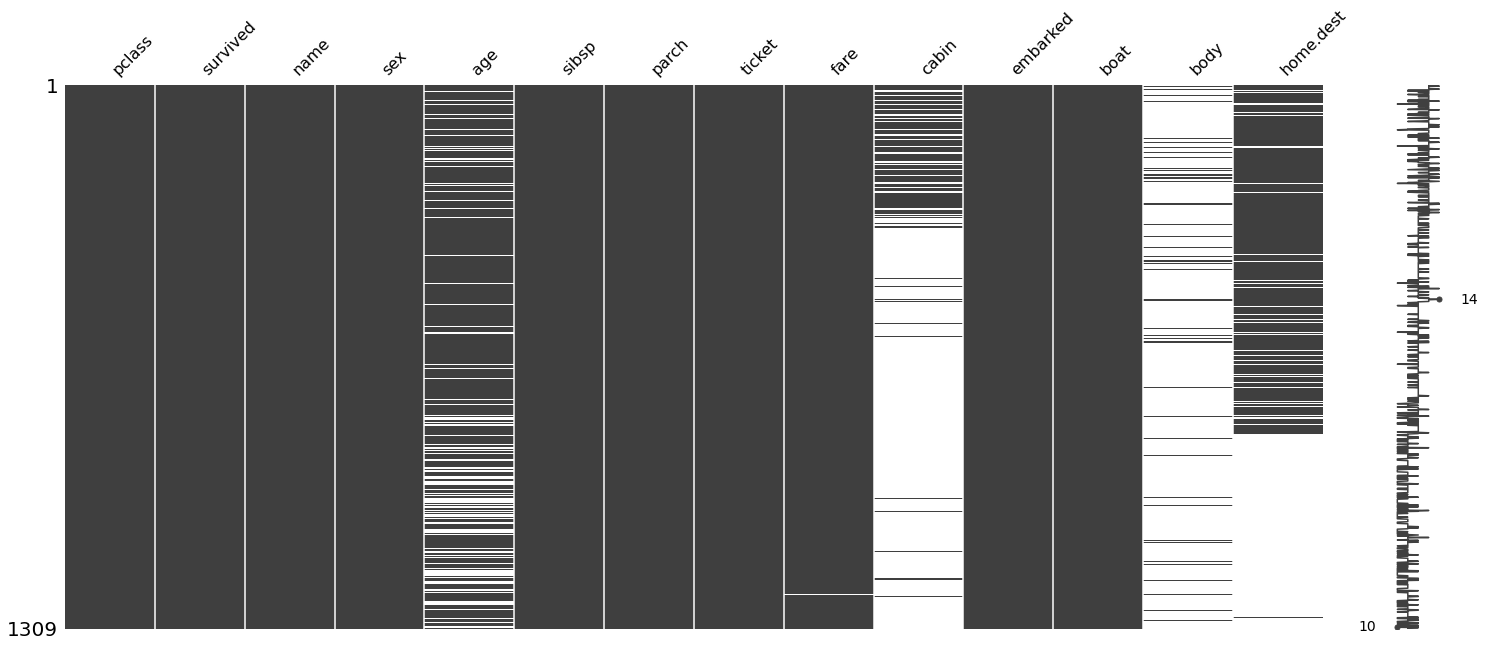

In [8]:
msno.matrix(data)  # taking a look at the missing data in relation to the other variables in the dataset

In [11]:
print('Missing data in each Titanic dataframe column:')

def view_missing(data):
    for c in data.columns:
        missing_data = len(data) - data[c].count()
    
        if (missing_data > 0 or missing_data =='NaN'):        
            print(f"    {c} is missing {str(round(float(missing_data / float(len(data))) * 100, 1))}% if its values ({missing_data})")


view_missing(data)

Missing data in each Titanic dataframe column:
    age is missing 20.1% if its values (263)
    fare is missing 0.1% if its values (1)
    cabin is missing 77.5% if its values (1014)
    embarked is missing 0.2% if its values (2)
    body is missing 90.8% if its values (1188)
    home.dest is missing 43.1% if its values (564)


analysis of the missing data:

    1: age is missimg 20% of its values.  I need to see if thiss can be supplemented because this would be aa desireable feature in survavbility analysis.
    2: cabin is mostly missing its values but the deck or general location of the cabin might be able to be inferred by the fare which is missing only 1 value    
    3: body number are mostly missing their data.  With over 50% of their data missing and unless this can be supplemented, its data will be dropped.
    4: boat is missing 63% of its data, let's see if this can be supplemented in some manner to see if it adds anything to the prediction.  
    4: home/destination is missing 43% of its data, we'll keep it in the dataset so othe ranalysis can be performed.

In [12]:
cols_num = data.select_dtypes(exclude="object") # select the numerical columns
cols_cat = data.select_dtypes(include="object") # select the categorical columns

In [13]:
uniques = {col:data[col].nunique() for col in cols_cat}  # retrieve unique values for each of the categeorical columns
for key in uniques:
    print(f"{key} has {uniques[key]} unique values")

name has 1307 unique values
sex has 2 unique values
ticket has 929 unique values
cabin has 186 unique values
embarked has 3 unique values
boat has 28 unique values
home.dest has 369 unique values


In [14]:
# age is usually an important indicator, we should impute the missing values for age:
# copy the data: 

titanic = data.copy()
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic.head()

# there are other ways that this could have been solved but due to the small dataset size, getting more precise here would likely have little return value in the end

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,nan,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,nan,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,nan,NaN,"Montreal, PQ / Chesterville, ON"


In [15]:
# the cabin is missing 77% of its values.  one method to solve IS to use the fare column.  more than likely the fare across cabins was similar

# create a new dataframe which only includes the available cabin numbers
cabinfare = titanic[['cabin', 'fare']]
cabinfare = cabinfare[cabinfare['cabin'].notna()]
cabinfare.reset_index(drop=True, inplace=True)
#cabinfare.head()


In [17]:
# i want to see the unique values in the deck field
x = ''

for i in range(0, (len(titanic.cabin))):
    cabin = titanic.cabin[i]
    
    if str(cabin) == "nan":
        val = cabinfare.iloc[(cabinfare['fare']-titanic.fare[i]).abs().argsort()[:1]]  # the :1 says send me back the closest record
        titanic.at[i,'cabin'] = str(val.iat[0,0])

regex = "(?P<deck>[A-Z])(?P<Number>[0-9]*)"
tmp = titanic['cabin'].str.extract(regex, expand=False)
titanic['deck'] = tmp['deck'].fillna('Z')

print(f"Unique FN: {titanic['deck'].unique()}")



Unique FN: ['B' 'C' 'E' 'D' 'A' 'F' 'T' 'G']


In [18]:
# next is to fix of 'embarked'
# 1) since most of the passengers embarked in southhampton, we should fill the emties in with 'S'%%!
# 2) drop the boat and body columns, too much missing data in each

titanic["embarked"].fillna("S", inplace = True)
titanic.drop(['boat', 'body', 'name', 'ticket', 'fare', 'cabin', 'home.dest'], axis=1, inplace=True)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,embarked,deck
0,1,1,female,29.0000,0,0,S,B
1,1,1,male,0.9167,1,2,S,C
2,1,0,female,2.0000,1,2,S,C
3,1,0,male,30.0000,1,2,S,C
4,1,0,female,25.0000,1,2,S,C


In [19]:
# change the keys to make them more descriptive

def label_survive(row):
    if row['survived'] == 1:
        return 'yes'
    if row['survived'] == 0:
        return 'no'
    else:    
        return 'unk'

        
def label_familysize(row):
    if row['sibsp'] + row['parch'] == 0:
        return 0
    if row['sibsp'] + row['parch'] == 1:
        return 1
    if row['sibsp'] + row['parch'] == 2:
        return 2
    else:    
        return 3

# embarked keys:
titanic.loc[:,'embarked'].replace(['C','S','Q'], ['Cherbourg','Southampton','Queenstown'], inplace=True)

# survived keys:
#titanic.loc[:,'survived'].replace([0,1],['no','yes'], inplace=True)
titanic['survived label'] = titanic.apply(lambda row: label_survive(row), axis = 1)
titanic['companions'] = titanic.apply(lambda row: label_familysize(row), axis = 1)



In [20]:
# looking at age in detail
# Get summary descriptive statistics
df_describe = pd.DataFrame(titanic['age'].describe())

#Change the index labels and round the values reported
df_describe.index = ['population size', 'mean', 'std. dev', 'min', '25% qt', 'median', '75% qt', 'max']
df_describe = df_describe.round(decimals=3)
df_describe

,age
population size,1309.000
mean,29.881
std. dev,12.883
min,0.167
25% qt,22.000
median,29.881
75% qt,35.000
max,80.000


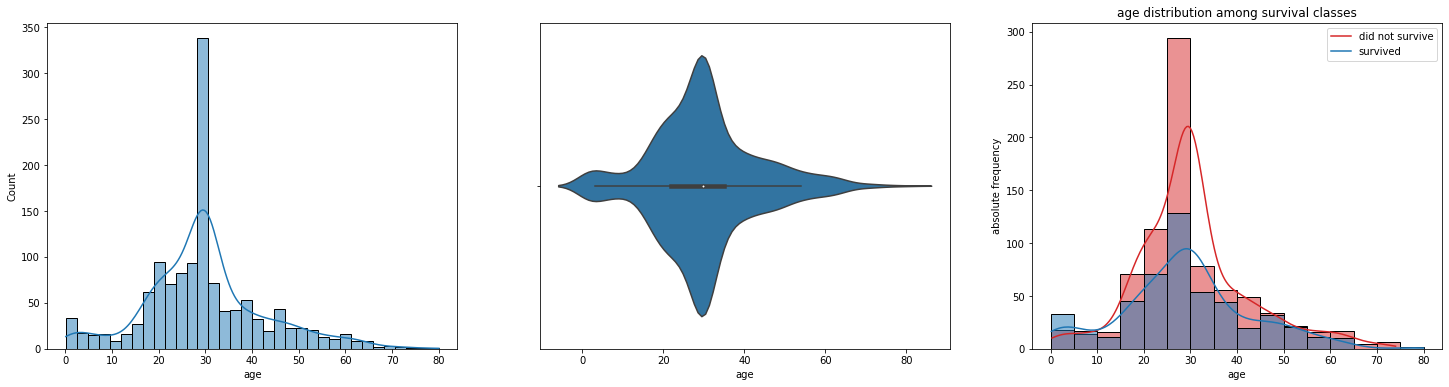

In [21]:
# visualizations on the data by age bins

fig, axs = plt.subplots(1, 3, figsize=( 25, 6))
sns.histplot(x= titanic['age'],  kde=True, ax = axs[0])
sns.violinplot(x= titanic['age'],  ax = axs[1])

age_bins = np.arange(0, titanic['age'].max()+5, 5) #np.arange(0, 80, 4)
sns.histplot(titanic.loc[(titanic['survived label']=='no') & (~titanic['age'].isnull()),'age'], bins=age_bins, color='#d62728',  kde=True,   ax = axs[2])
sns.histplot(titanic.loc[(titanic['survived label']=='yes') & (~titanic['age'].isnull()),'age'], bins=age_bins,  kde=True,   ax = axs[2])
plt.title('age distribution among survival classes')
plt.ylabel('absolute frequency')
plt.legend(['did not survive', 'survived'])
plt.show()



chart descriptions (from left to right)

- histogram plot of the ages with the KDE plot superimposed
- violin plot of the ages 
- histogram plot of the surivialbility with the KDE plot superimposed



No handles with labels found to put in legend.


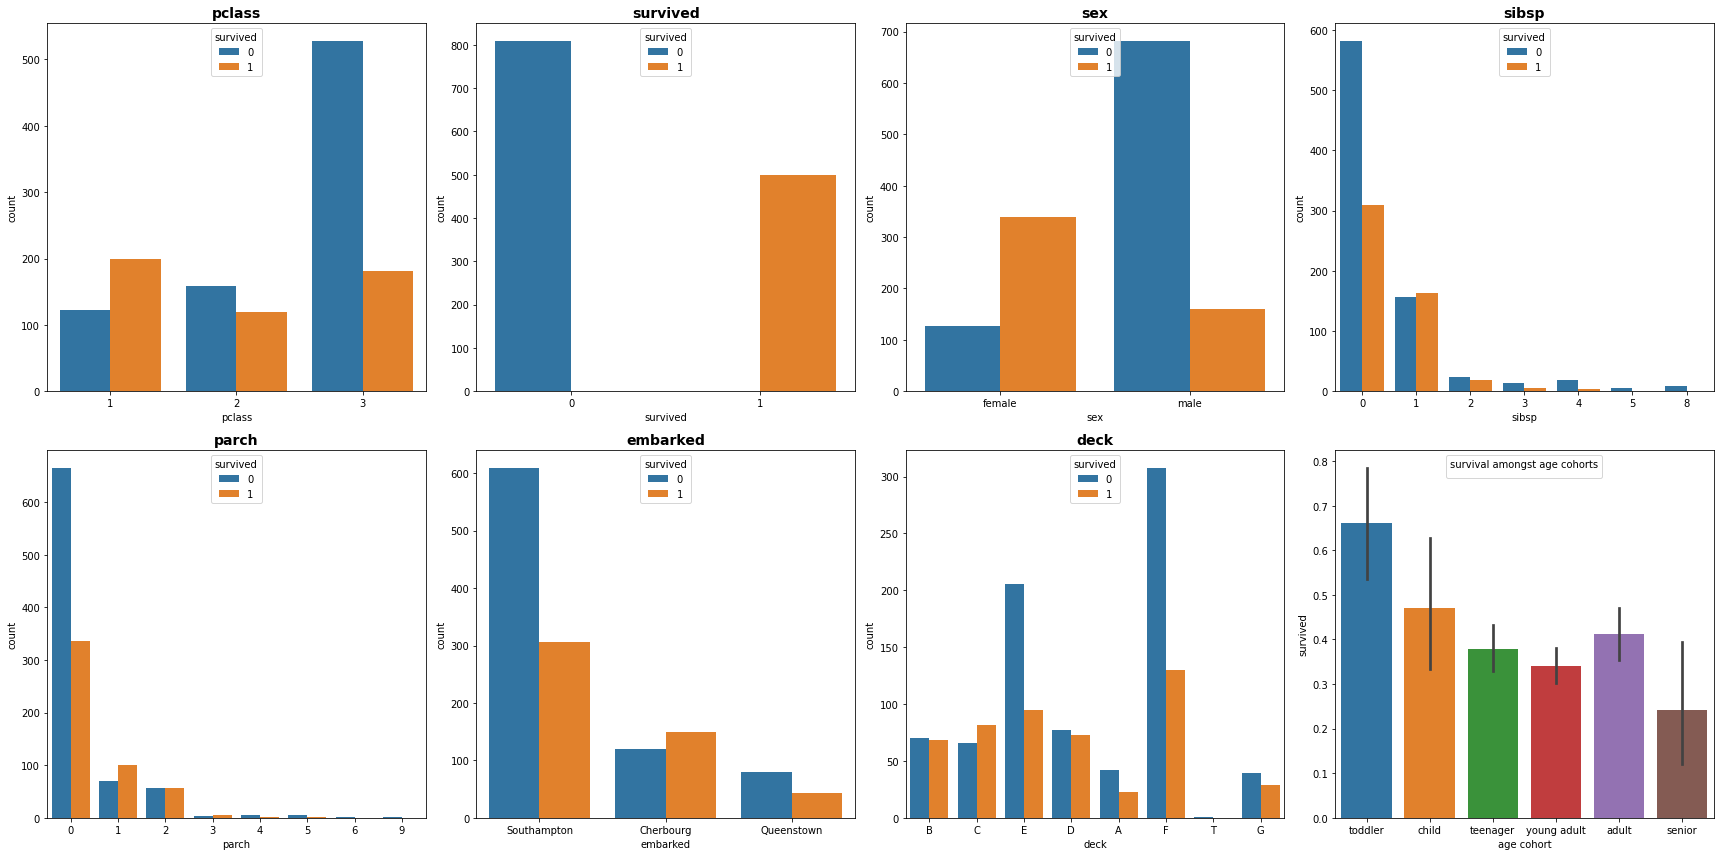

In [22]:

# for the age cohorts ===============
bins = [0, 5, 14, 25, 35, 60, np.inf]
labels = ['toddler', 'child', 'teenager', 'young adult', 'adult', 'senior']
titanic['age cohort'] = pd.cut(titanic["age"], bins, labels = labels)

# for the columns being used in the charts
cols = ['pclass', 'survived', 'sex',  'sibsp', 'parch', 'embarked', 'deck','age']

vz_rows = 2
vz_cols = 4

fig, axs = plt.subplots(vz_rows, vz_cols, figsize=( vz_cols * 6, vz_rows * 6))

for r in range(0, vz_rows):
    for c in range(0, vz_cols):
        if r==1 and c==3: # draw the last chart differently from the others            
            ax = axs[r][c]
            sns.barplot(x="age cohort", y="survived", data=titanic, ax = ax)
            #ax.set_title(cols[i], fontsize= 14, fontweight= 'bold')
            ax.legend(title= 'survival amongst age cohorts', loc= 'upper center')
        else:
            i = r * vz_cols + c
            ax = axs[r][c]
            sns.countplot(x= titanic[cols[i]], hue=titanic['survived'],  ax = ax)        
            ax.set_title(cols[i], fontsize= 14, fontweight= 'bold')
            ax.legend(title= 'survived', loc= 'upper center')
plt.tight_layout()



analysis: for the age groups, the youngest ages had the best chance of survival while adults experienced a better surivial rate than either teenagers or young adults.  

The charts above show that a male travelling without family and not in first class would have a poor chance of surviving the sinking.


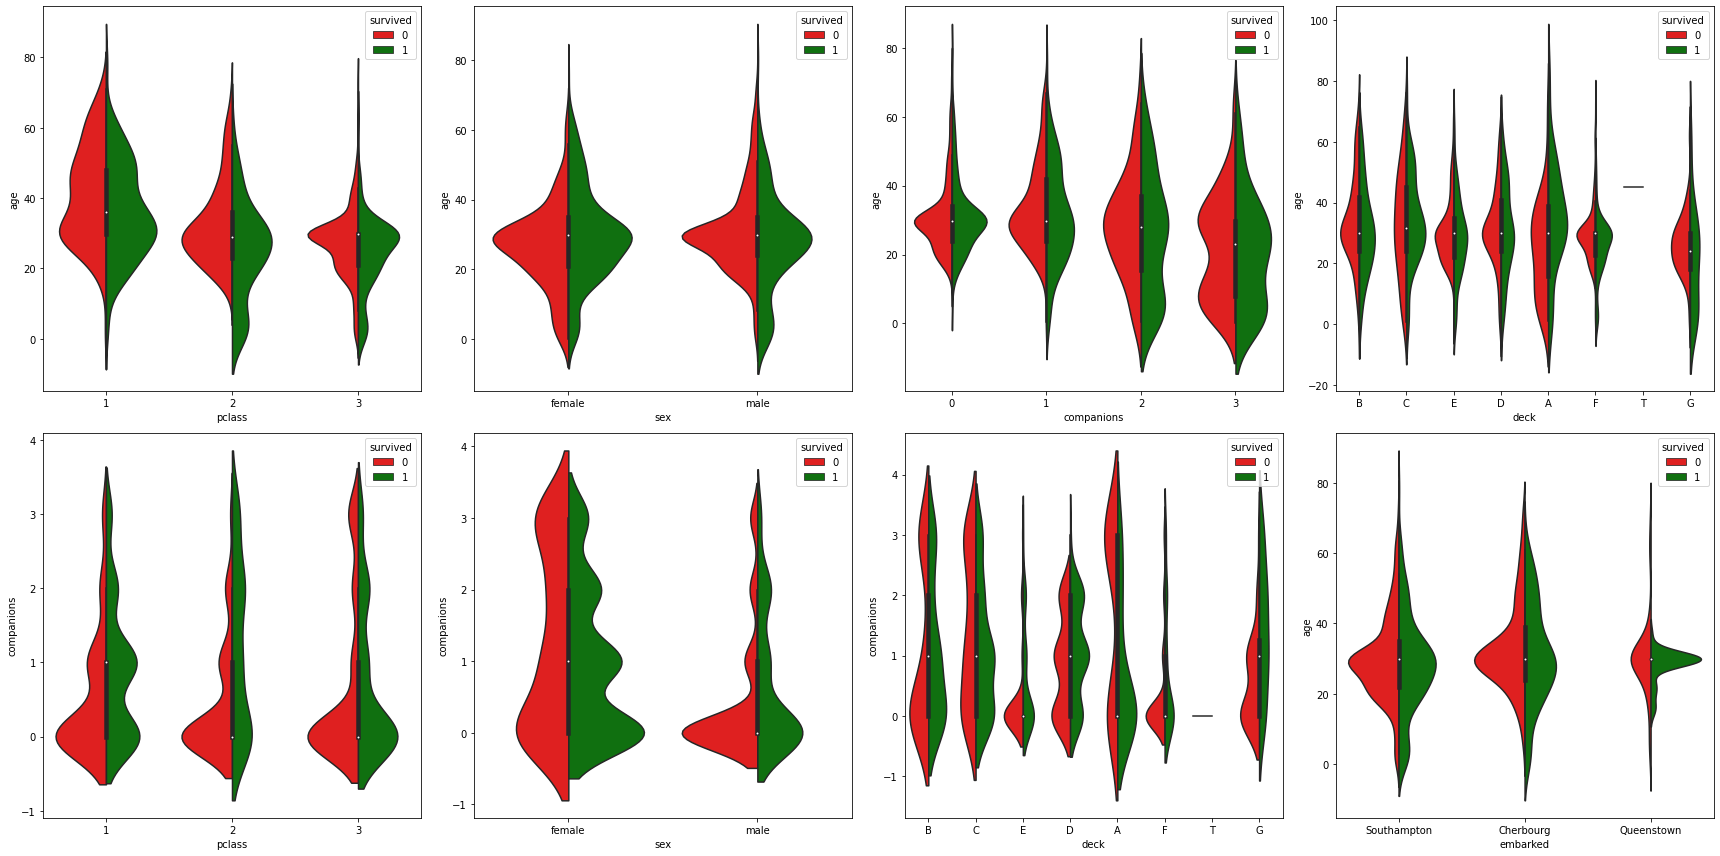

In [23]:
# look at survivorship amongst various groups
# age / pclass
# age / sex
# pclass / family


cols1 = ['pclass', 'sex',  'companions', 'deck', 'pclass', 'sex','deck', 'embarked' ]
cols2 = ['age', 'age',  'age', 'age', 'companions', 'companions','companions', 'age']

vz_rows = 2
vz_cols = 4

fig, axs = plt.subplots(vz_rows, vz_cols, figsize=( vz_cols * 6, vz_rows * 6))

for r in range(0, vz_rows):
    for c in range(0, vz_cols):        
        i = r * vz_cols + c
        ax = axs[r][c]
        sns.violinplot(x= titanic[cols1[i]], y=titanic[cols2[i]], hue=titanic['survived'], split=True, palette={0: 'r', 1: 'g'}, ax = ax)   
        #ax.set_title(cols[i], fontsize= 14, fontweight= 'bold')
        #ax.legend(title= 'survived', loc= 'upper center')
plt.tight_layout()



#sns.violinplot(x=’Pclass’, y=’Age’, hue=’Survived’, split=True, data=train_data, palette={0: “r”, 1: “g”});


some interesting things to notice in these charts are the steep hills in the various plots.  For example in the first chart in the upper left, the third class aged 30-ish had a large bump in non-survival.  Also, the males with no companions showed a steep slope when it came to not surviving the titantic disaster.  Finally, in an unexpected find, those departing from Queenstown had a very steep slope in their survivability.  What may have caused this, thiss is something to look into.

In [24]:

# set up values for a class plot chart

pclass = [1,2,3]
# ageLbound = [60, 40, 20]
# ageUbound = [99, 60, 40]

#ageLbound = [70,65,60,55,50,45,40,35,30,25,20,15,10,5,0]
#ageUbound = [99,70,65,60,55,50,45,40,35,30,25,20,15,10,5]

ageLbound = [70,60,50,40,30,20,10,0]
ageUbound = [99,70,60,50,40,30,20,10]


sex = ['male', 'female']

df_stat = pd.DataFrame(columns = ['class', 'sex', 'age', 'surv_pct'])

def div(x,y):
    if y == 0: return 0
    return x / y

for c in range(0, 3):
    for a in range(0, 8):
        for s in range(0,2):

            rate = round(div(len(titanic[(titanic['pclass']==pclass[c]) & (titanic['age']>ageLbound[a]) & (titanic['age']<=ageUbound[a]) \
                        & (titanic['survived']==1) & (titanic['sex']==sex[s]) ]) , len(titanic[(titanic['pclass']==pclass[c]) & \
                        (titanic['age']>ageLbound[a]) & (titanic['age']<=ageUbound[a]) & (titanic['sex']==sex[s]) ]))*100,1)

            df_stat = df_stat.append({'class':pclass[c], 'sex':sex[s], 'age':ageLbound[a], 'surv_pct':rate}, ignore_index=True)
            

#sns.lineplot(x= 'class', y= 'surv_pct', hue='sex', data=df_stat)

 

<AxesSubplot:xlabel='age', ylabel='surv_pct'>

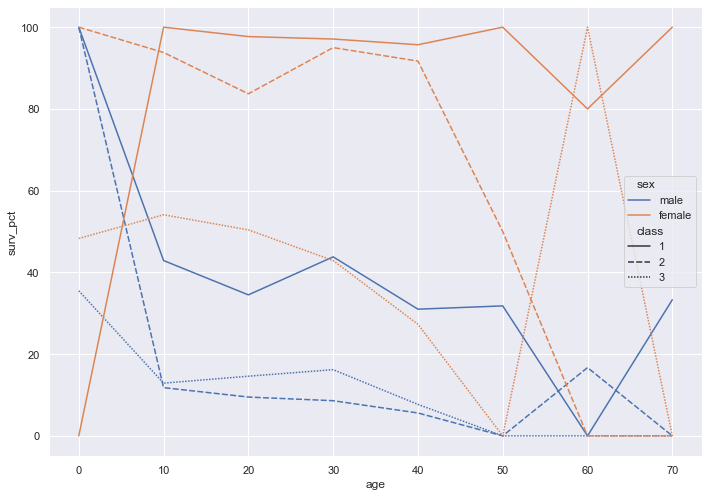

In [26]:

# set up a complex line chart to display the classes, gender and their ages 

sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot( x = 'age',
             y = 'surv_pct',
             hue = 'sex',
             style= 'class',
             data = df_stat)

             

analysis: although close to be confusing, the chart above shows a male in the third class, over the age of ten had a low chance to survive the sinking.  a female, above the age of ten and in first class had the best chance to survive.

In [27]:
# remove redundant features
titanic.drop(['age', 'survived label'], axis=1, inplace=True)
titanic.head()

,pclass,survived,sex,sibsp,parch,embarked,deck,companions,age cohort
0,1,1,female,0,0,Southampton,B,0,young adult
1,1,1,male,1,2,Southampton,C,3,toddler
2,1,0,female,1,2,Southampton,C,3,toddler
3,1,0,male,1,2,Southampton,C,3,young adult
4,1,0,female,1,2,Southampton,C,3,teenager


In [28]:
# export dataset to be used by model
titanic.to_csv('./data/titanic.csv')